In [2]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import ipaddress

df = pd.read_csv("dataset_with_source_geo.csv")



In [3]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Source_Country,Source_Continent_Code,Source_organization
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,China,AS,NaN
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,France,EU,Free SAS
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,United States,NaN,UUNET
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,Japan,AS,Research Organization of Information and Syste...
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,United States,NaN,UUNET


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.day
df['day_of_week'] = df['Timestamp'].dt.day_name()
df['month_name'] = df['Timestamp'].dt.month_name()
df[['Timestamp', 'hour', 'day', 'day_of_week', 'month_name']].head()

,Timestamp,hour,day,day_of_week,month_name
0,2023-05-30 06:33:58,6,30,Tuesday,May
1,2020-08-26 07:08:30,7,26,Wednesday,August
2,2022-11-13 08:23:25,8,13,Sunday,November
3,2023-07-02 10:38:46,10,2,Sunday,July
4,2023-07-16 13:11:07,13,16,Sunday,July


In [7]:
attacks_by_hour = df['hour'].value_counts().sort_index()
attacks_by_hour

hour
0     1705
1     1630
2     1653
3     1652
4     1723
5     1673
6     1633
7     1623
8     1664
9     1639
10    1691
11    1665
12    1588
13    1737
14    1661
15    1720
16    1676
17    1671
18    1665
19    1665
20    1724
21    1682
22    1603
23    1657
Name: count, dtype: int64

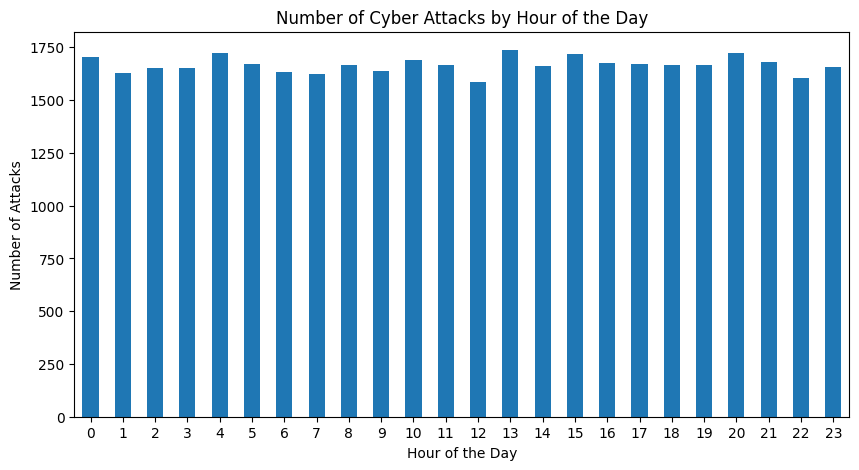

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
attacks_by_hour.plot(kind='bar')
plt.title('Number of Cyber Attacks by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

In [9]:
attacks_hour_type = (
    df
    .groupby(['hour', 'Attack Type'])
    .size()
    .reset_index(name='count')
)

attacks_hour_type.head()

,hour,Attack Type,count
0,0,DDoS,604
1,0,Intrusion,544
2,0,Malware,557
3,1,DDoS,567
4,1,Intrusion,531


In [10]:
pivot_hour_type = attacks_hour_type.pivot(
    index='hour',
    columns='Attack Type',
    values='count'
).fillna(0)

pivot_hour_type

Attack Type,DDoS,Intrusion,Malware
hour,,,
0,604,544,557
1,567,531,532
2,559,548,546
3,555,560,537
4,574,575,574
5,547,567,559
6,541,553,539
7,563,526,534
8,570,564,530


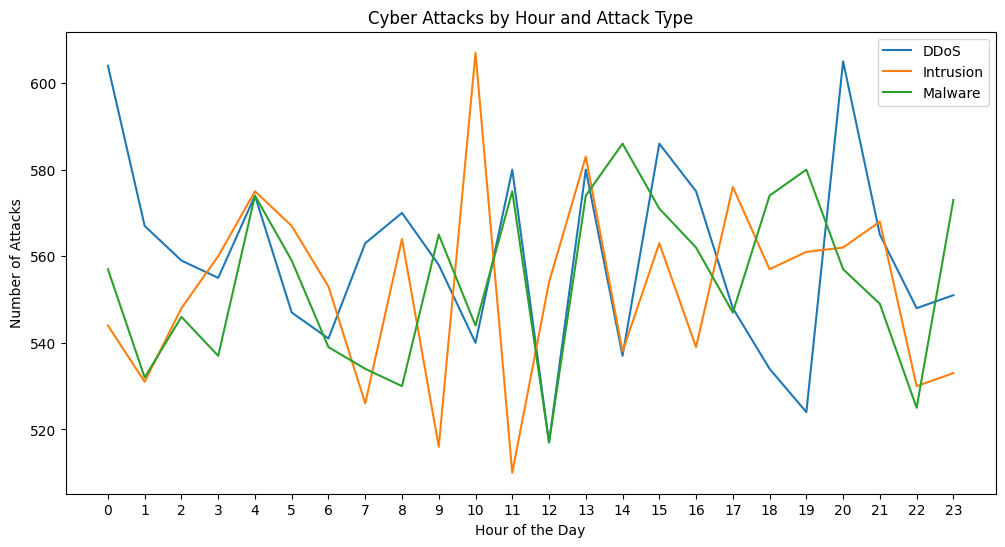

In [11]:
plt.figure(figsize=(12,6))
for attack in pivot_hour_type.columns:
    plt.plot(pivot_hour_type.index, pivot_hour_type[attack], label=attack)

plt.title('Cyber Attacks by Hour and Attack Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Attacks')
plt.legend()
plt.xticks(range(0,24))
plt.show()

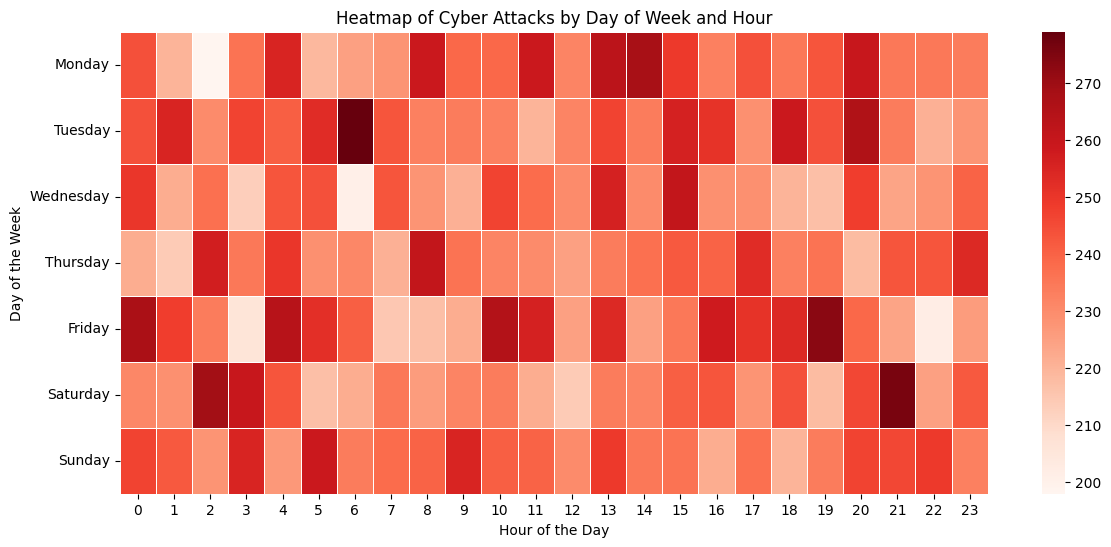

In [12]:
heatmap_data = (
    df
    .groupby(['day_of_week', 'hour'])
    .size()
    .reset_index(name='count')
)

heatmap_pivot = heatmap_data.pivot(
    index='day_of_week',
    columns='hour',
    values='count'
)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
              'Friday', 'Saturday', 'Sunday']

heatmap_pivot = heatmap_pivot.reindex(days_order)

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_pivot,
    cmap='Reds',
    linewidths=0.5
)

plt.title('Heatmap of Cyber Attacks by Day of Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In [13]:
severity_counts = df['Severity Level'].value_counts()
severity_counts

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

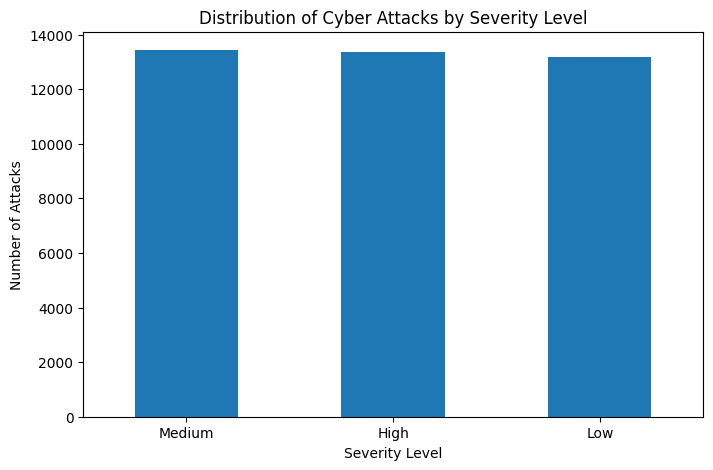

In [14]:
severity_counts.plot(
    kind='bar',
    figsize=(8,5),
    title='Distribution of Cyber Attacks by Severity Level'
)

plt.xlabel('Severity Level')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

In [15]:
severity_by_hour = (
    df
    .groupby(['hour', 'Severity Level'])
    .size()
    .reset_index(name='count')
)

severity_by_hour.head()

,hour,Severity Level,count
0,0,High,535
1,0,Low,552
2,0,Medium,618
3,1,High,555
4,1,Low,558


In [16]:
pivot_severity_hour = severity_by_hour.pivot(
    index='hour',
    columns='Severity Level',
    values='count'
).fillna(0)

pivot_severity_hour

Severity Level,High,Low,Medium
hour,,,
0,535,552,618
1,555,558,517
2,560,559,534
3,570,508,574
4,590,568,565
5,568,574,531
6,533,568,532
7,569,517,537
8,535,566,563


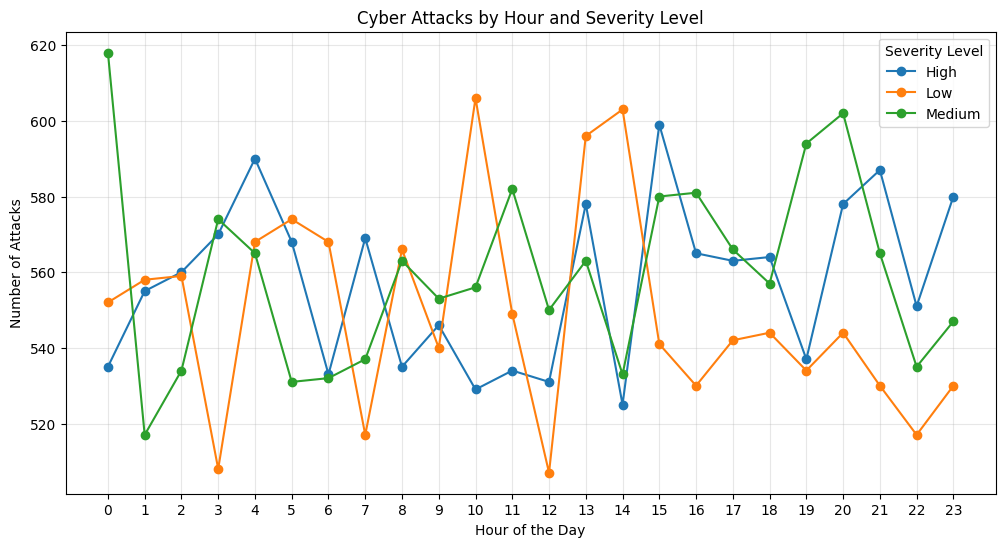

In [17]:
plt.figure(figsize=(12,6))
for severity in pivot_severity_hour.columns:
    plt.plot(
        pivot_severity_hour.index,
        pivot_severity_hour[severity],
        marker='o',
        label=severity
    )

plt.title('Cyber Attacks by Hour and Severity Level')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Attacks')
plt.xticks(range(0,24))
plt.legend(title='Severity Level')
plt.grid(alpha=0.3)
plt.show()

In [20]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)


In [21]:
df.isnull().sum().sort_values(ascending=False)


Source_Continent_Code     17914
Source_organization        6570
Source_Country              369
Timestamp                     0
Destination Port              0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators            0
Anomaly Scores                0
Alerts/Warnings               0
Protocol                      0
Packet Length                 0
Packet Type                   0
Action Taken                  0
Attack Signature              0
Attack Type                   0
Severity Level                0
Geo-location Data             0
User Information              0
Device Information            0
Network Segment               0
IDS/IPS Alerts                0
Firewall Logs                 0
Proxy Information             0
Log Source                    0
hour                          0
day                           0
day_of_week                   0
month_na

In [22]:
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                           35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                               34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                               33
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                           31
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                           31
                                                                                                                                          ..
Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gecko/6248-04-01 13:49:59 Firefox/3.8                                                       

In [23]:
df['Browser'] = df['Device Information'].str.split('/').str[0]
df['Browser']

0        Mozilla
1        Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
          ...   
39995    Mozilla
39996    Mozilla
39997    Mozilla
39998    Mozilla
39999    Mozilla
Name: Browser, Length: 40000, dtype: object

In [24]:
import re
# OS and device patterns to search for
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [25]:
df['Browser'].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

In [26]:
df['Device/OS'].value_counts()

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

In [27]:
df = df.drop('Device Information', axis = 1)

In [28]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Log Source,Source_Country,Source_Continent_Code,Source_organization,hour,day,day_of_week,month_name,Browser,Device/OS
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Server,China,AS,NaN,6,30,Tuesday,May,Mozilla,Windows
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Firewall,France,EU,Free SAS,7,26,Wednesday,August,Mozilla,Windows
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Firewall,United States,NaN,UUNET,8,13,Sunday,November,Mozilla,Windows
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Firewall,Japan,AS,Research Organization of Information and Syste...,10,2,Sunday,July,Mozilla,Macintosh
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Firewall,United States,NaN,UUNET,13,16,Sunday,July,Mozilla,Windows
